<a href="https://colab.research.google.com/github/brendanpshea/computing_concepts_python/blob/main/IntroCS_11_OperatingSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is an Operating System? Core Functions and Components

An operating system (OS) is the fundamental software that manages computer hardware and provides services for computer programs. Think of the OS as a bridge connecting your applications to the physical components of your computer. Without an operating system, each application would need to know how to directly communicate with hardware devices, which would be inefficient and impractical. Common operating systems include Microsoft Windows, macOS, and Linux distributions like Ubuntu (which we'll be using in this course).

## Core Functions of an Operating System

The operating system performs several critical functions that enable computers to run efficiently. Here are the main responsibilities:

* Controls the creation, scheduling, and termination of processes (running programs) through **process management**
* Allocates and deallocates **memory space** as needed by various processes
* Organizes and maintains files and directories on storage devices through **file system management**
* Controls input/output devices and provides interfaces for applications to use them
* Provides a way for users to interact with the computer (command-line or graphical interface)
* Protects system resources and user data through authentication and permissions

## Main Components of Modern Operating Systems

Modern operating systems consist of several integrated components that work together. These are the essential parts:

* The core component that directly interacts with hardware, called the **kernel**, has complete control over everything in the system
* An interface for users to interact with the kernel through commands or graphical elements, known as the **shell**
* A structured organization for storing, retrieving, and updating data on storage devices, called the **file system**
* Special programs called **device drivers** that allow the OS to communicate with specific hardware devices

# Understanding Linux and Ubuntu: Introduction to Command Line

Linux is a popular, free, and open-source operating system kernel that forms the foundation for many different operating systems (called distributions). Ubuntu is one of the most popular Linux distributions, known for its ease of use and strong community support, making it perfect for beginners.

## What Makes Linux and Ubuntu Special?

Linux-based operating systems like Ubuntu have several distinctive characteristics:

* **Open-source** means anyone can view, modify, and distribute the code, leading to continuous improvement
* The **multi-user design** allows multiple people to use the same computer simultaneously, each with their own files and settings
* Linux provides strong **security features** with permissions and user privilege separation
* It's known for **stability and reliability**, which is why it powers most web servers and supercomputers
* Ubuntu is specifically designed to be **user-friendly** while still providing all the power of Linux

## The Linux Command Line and GUI

Linux offers two main ways to interact with the system:

* The **Graphical User Interface (GUI)** provides a visual way to interact with the system using windows, icons, and menus
* The **Command Line Interface (CLI)** lets you type text commands to control the computer
* The command line, despite its text-based nature, is often more powerful and efficient for many tasks
* Most Linux systems run a command line program called a **shell**, with the most common being **Bash**
* Ubuntu uses the GNOME desktop environment as its default GUI

## Using Linux Commands in Jupyter Notebooks

Jupyter notebooks provide a convenient way to run Linux commands directly alongside Python code:

```python

```



In [3]:
# Run a Linux command in Jupyter by adding an exclamation mark (!) at the beginning
# This command shows the current directory
!pwd

/content


In [4]:
# You can store command output in Python variables
current_dir = !pwd
print(f"I am currently in: {current_dir[0]}")

I am currently in: /content


In [5]:
# You can use Python variables in commands with the {} syntax
filename = "example.txt"
!echo "Hello, world!" > {filename}
!cat {filename}

Hello, world!


# The OS Architecture: Kernel and User Space Explained

Modern operating systems like Ubuntu are designed with a clear separation between two main parts: the kernel and user space. This separation is fundamental to system stability and security. Let's explore how these parts work together.

## The Two-Level Architecture

Operating systems organize their work into two main protection domains:

* The core part of the operating system called the **kernel** runs with full access to all hardware
* Your applications and programs run in **user space**, where they have limited permissions for safety
* Programs request services from the kernel through special doorways called **system calls**
* This separation prevents a single buggy program from crashing your entire computer

## System Calls: The Bridge Between Applications and Hardware

System calls allow your programs to request services from the kernel:

* When your program needs to save a file, it makes a **system call** to the kernel
* The kernel performs the actual work of writing data to the disk
* System calls for file operations include open, read, write, and close
* Other common system calls handle tasks like creating new processes and accessing network resources
* All of these happen automatically when you use Python's file functions or run programs

## Types of Kernels

Different operating systems organize their kernels in different ways:

| Kernel Type | How It Works | Examples |
|-------------|--------------|----------|
| Monolithic | All OS services run in kernel space | Linux (Ubuntu), FreeBSD |
| Microkernel | Only essential services in kernel, others run as normal programs | MINIX, QNX |
| Hybrid | Combines aspects of both approaches | Windows, macOS |

Ubuntu uses the Linux kernel, which is a monolithic design. This technical choice affects how the system performs and how secure it is, though as a regular user you don't need to worry about these details to use the system effectively.

Understanding this architecture helps explain why some operations require special permissions and why the operating system can keep running even when individual applications crash.

When you run these commands in Jupyter, you're actually sending them to the Linux operating system running underneath. This combination gives you the power of both Python and Linux tools in a single environment, which is perfect for learning about operating systems and for data analysis.

In the upcoming sections, we'll explore the most essential Linux commands and how the operating system manages resources like files, processes, and memory. We'll focus on the commands that beginners should know, with practical examples you can try in your Jupyter notebooks.

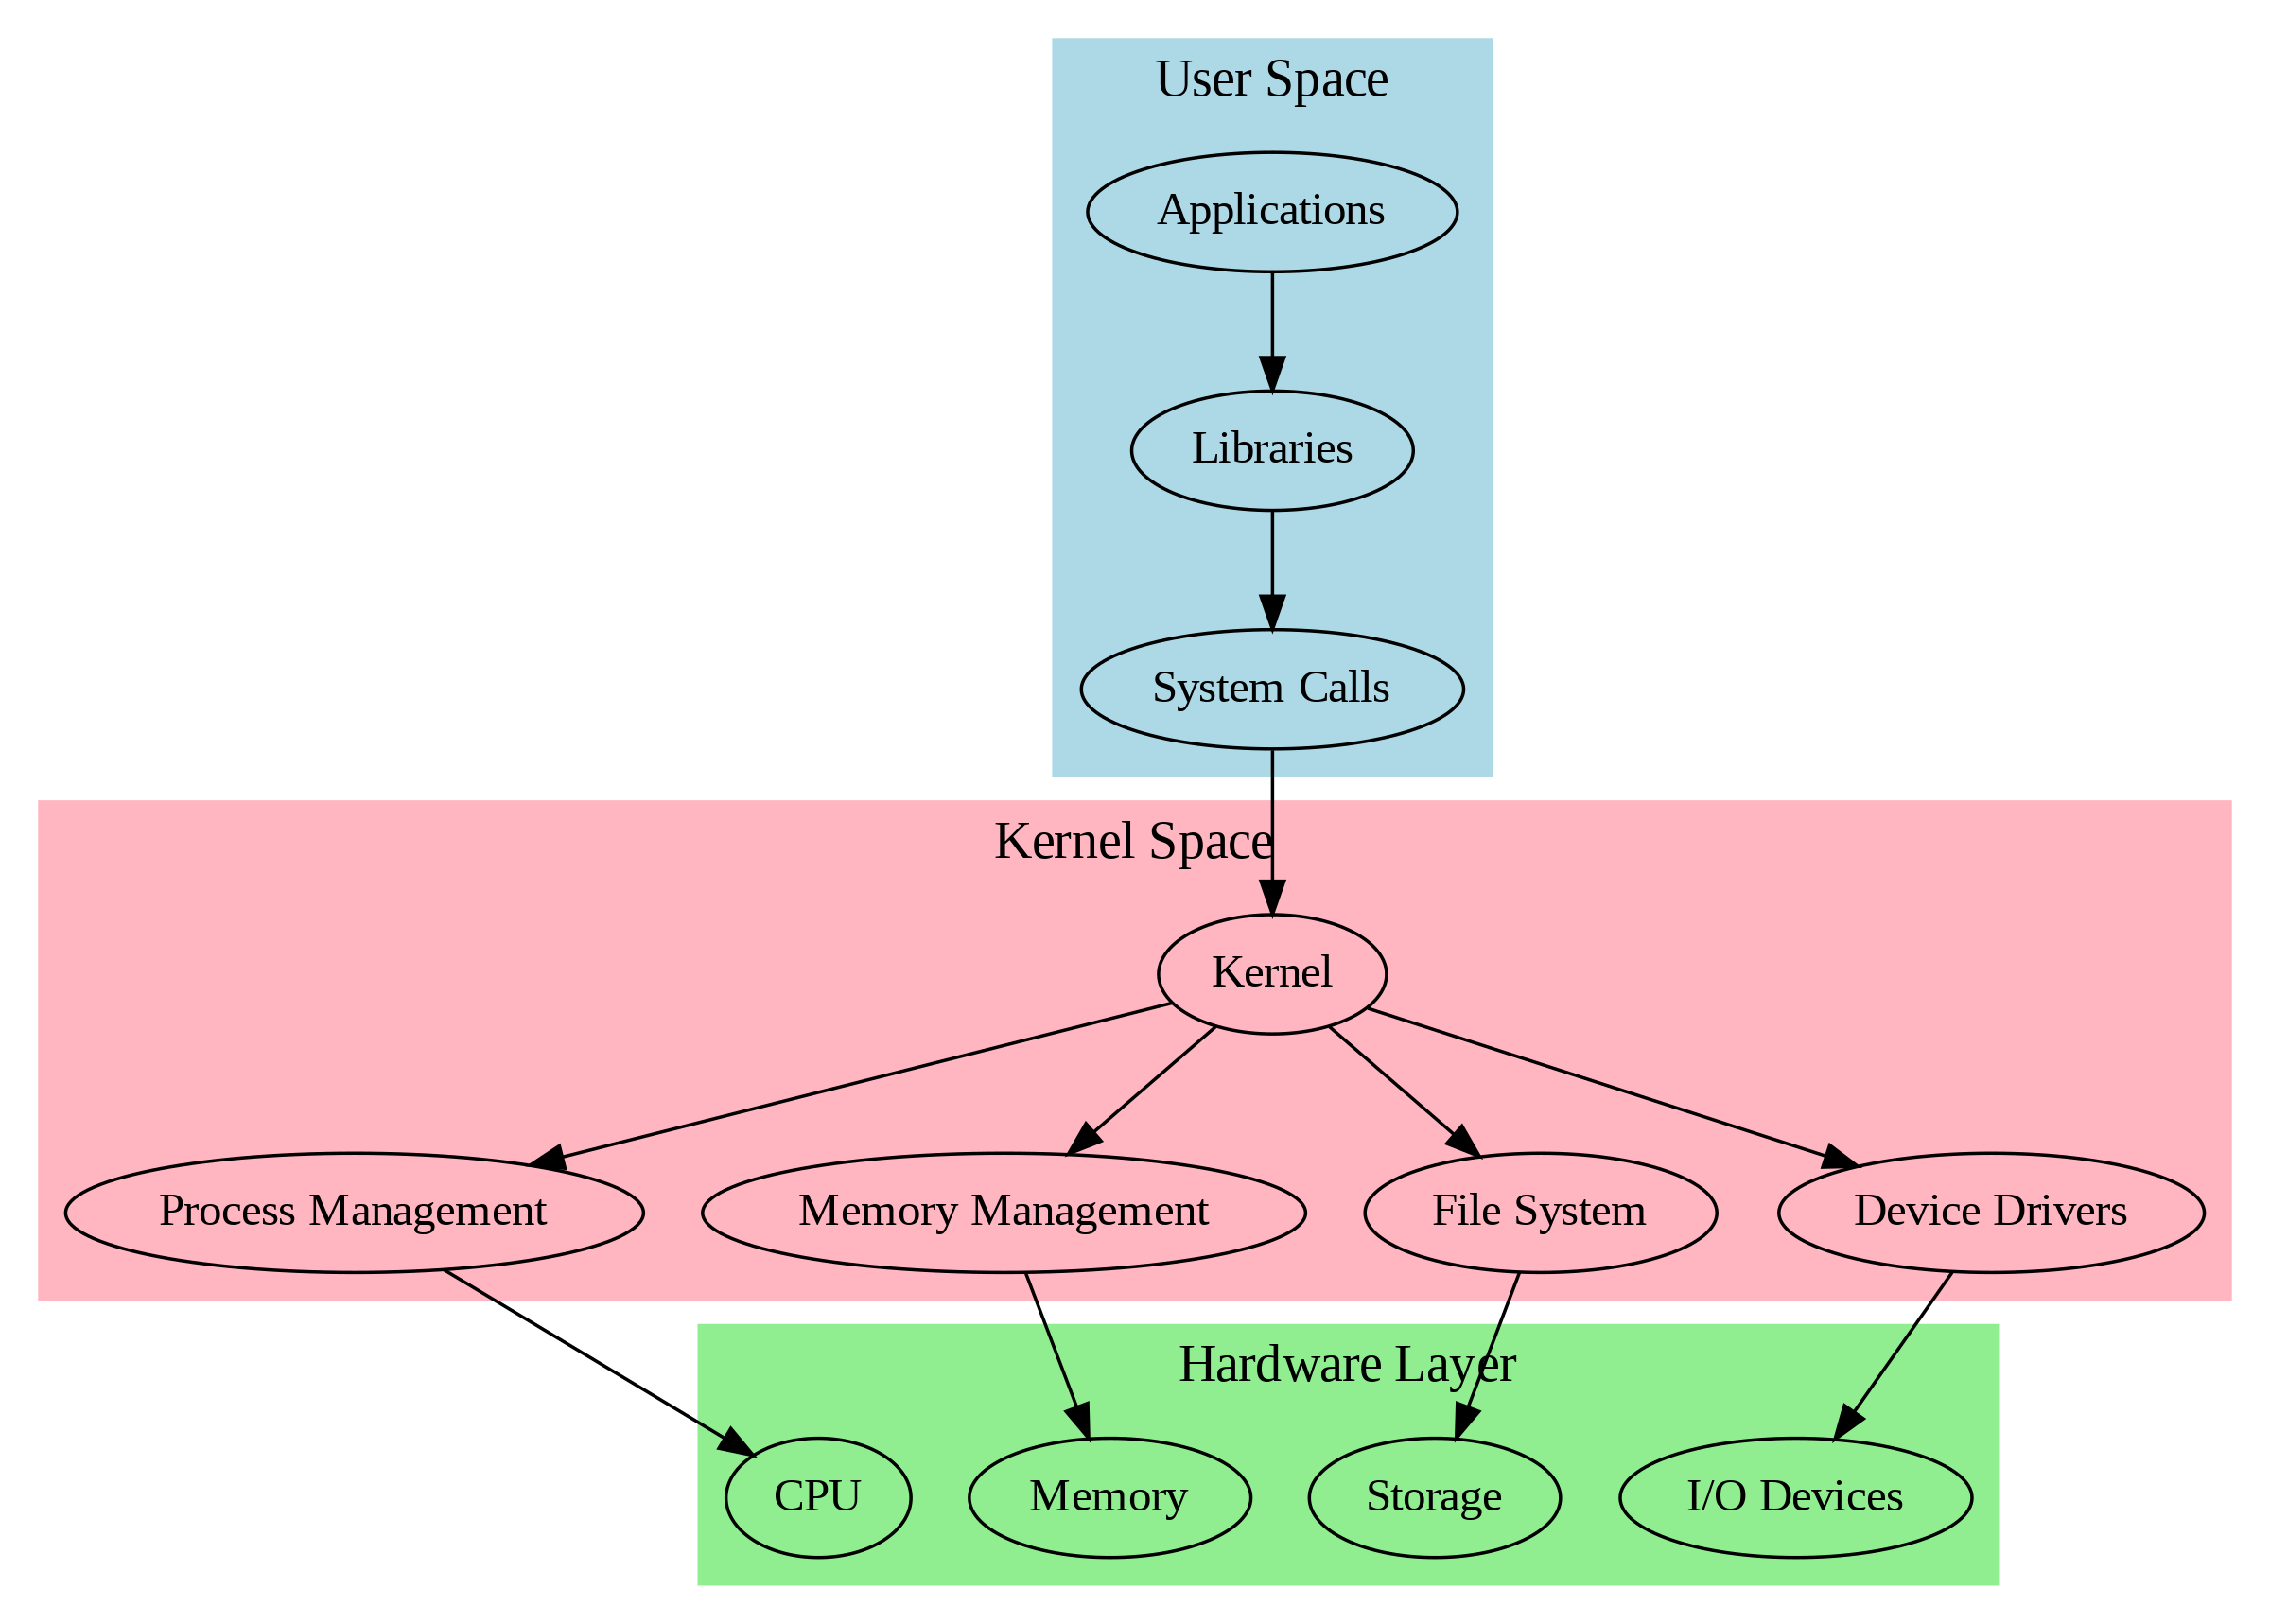

In [51]:
# @title
import graphviz as gv
from IPython.display import Image

# Create a directed graph
g = gv.Digraph(format='png')
g.attr(rankdir='TB', size='8,6', dpi='300')

# Create clusters for each layer
with g.subgraph(name='cluster_user') as c:
    c.attr(label='User Space', style='filled', color='lightblue', fontsize='16')
    c.node('apps', 'Applications')
    c.node('libs', 'Libraries')
    c.node('syscalls', 'System Calls')
    c.edge('apps', 'libs')
    c.edge('libs', 'syscalls')

with g.subgraph(name='cluster_kernel') as c:
    c.attr(label='Kernel Space', style='filled', color='lightpink', fontsize='16')
    c.node('kernel', 'Kernel')
    c.node('process', 'Process Management')
    c.node('memory', 'Memory Management')
    c.node('fs', 'File System')
    c.node('drivers', 'Device Drivers')
    c.edge('kernel', 'process')
    c.edge('kernel', 'memory')
    c.edge('kernel', 'fs')
    c.edge('kernel', 'drivers')

with g.subgraph(name='cluster_hardware') as c:
    c.attr(label='Hardware Layer', style='filled', color='lightgreen', fontsize='16')
    c.node('cpu', 'CPU')
    c.node('ram', 'Memory')
    c.node('disk', 'Storage')
    c.node('devices', 'I/O Devices')

# Connect the layers
g.edge('syscalls', 'kernel')
g.edge('process', 'cpu')
g.edge('memory', 'ram')
g.edge('fs', 'disk')
g.edge('drivers', 'devices')

# Render the graph
g.render('os_components', view=False)

# Display the graph in the notebook
Image('os_components.png', width=600)


# Process Management: How the OS Handles Multiple Programs

Have you ever wondered how your computer can run many programs at once? Modern computers run multiple applications simultaneously, from visible programs to background services. The operating system's process management system makes this possible.

## What is a Process?

A process is a program in action - a running instance of a computer program:

* A **process** is a program that's currently executing, with its own memory space and resources
* Each process has its own **memory space** that contains the program code and data
* Processes exist in different **states** like running, waiting, or ready
* The **scheduler** is the part of the operating system that decides which process runs when
* Modern systems often break processes into smaller units called **threads** that can run simultaneously

## How the OS Juggles Multiple Processes

The operating system must decide which programs get CPU time through scheduling:

* **Round Robin** scheduling gives each process a small time slice in rotation, ensuring everyone gets a turn
* Processes get **priorities** that determine how much attention they receive from the CPU
* **Multitasking** allows the CPU to switch rapidly between different processes
* This switching happens so quickly that it creates the illusion of programs running simultaneously
* The scheduler balances giving immediate attention to user actions while ensuring background tasks progress

Understanding process management helps explain why your computer can run multiple applications smoothly. The operating system's ability to manage processes is what lets you listen to music while browsing the web and writing a document, all at the same time.

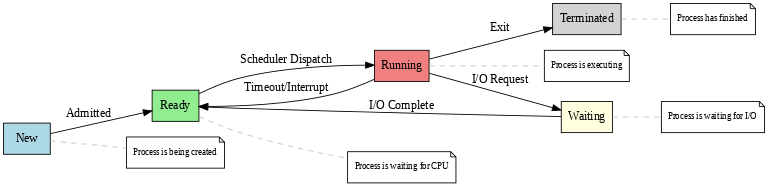

In [54]:
# @title
import graphviz as gv

# Create a directed graph
g = gv.Digraph(format='png')
g.attr(rankdir='LR', size='8,5')

# Define nodes with shapes and colors
g.node('new', 'New', shape='box', style='filled', fillcolor='lightblue')
g.node('ready', 'Ready', shape='box', style='filled', fillcolor='lightgreen')
g.node('running', 'Running', shape='box', style='filled', fillcolor='lightcoral')
g.node('waiting', 'Waiting', shape='box', style='filled', fillcolor='lightyellow')
g.node('terminated', 'Terminated', shape='box', style='filled', fillcolor='lightgrey')

# Define edges with labels
g.edge('new', 'ready', label='Admitted')
g.edge('ready', 'running', label='Scheduler Dispatch')
g.edge('running', 'ready', label='Timeout/Interrupt')
g.edge('running', 'waiting', label='I/O Request')
g.edge('waiting', 'ready', label='I/O Complete')
g.edge('running', 'terminated', label='Exit')

# Add notes for each state
g.node('note_new', 'Process is being created', shape='note', fontsize='10')
g.node('note_ready', 'Process is waiting for CPU', shape='note', fontsize='10')
g.node('note_running', 'Process is executing', shape='note', fontsize='10')
g.node('note_waiting', 'Process is waiting for I/O', shape='note', fontsize='10')
g.node('note_term', 'Process has finished', shape='note', fontsize='10')

# Invisible edges for positioning notes
g.edge('new', 'note_new', style='dashed', color='gray', arrowhead='none')
g.edge('ready', 'note_ready', style='dashed', color='gray', arrowhead='none')
g.edge('running', 'note_running', style='dashed', color='gray', arrowhead='none')
g.edge('waiting', 'note_waiting', style='dashed', color='gray', arrowhead='none')
g.edge('terminated', 'note_term', style='dashed', color='gray', arrowhead='none')

# Render the graph
g.render('process_states', view=False)
Image('process_states.png', width=900)

# Memory Management: From Physical to Virtual Memory

Memory management is one of the operating system's most critical jobs. It controls how programs access RAM (Random Access Memory) and ensures that all programs get the memory they need without interfering with each other.

## Physical Memory and Its Limitations

Physical memory refers to the actual RAM chips installed in your computer:

* **Physical memory** (RAM) is where programs and data are stored while actively being used
* Early computers had very limited memory that programs accessed directly
* This direct access created problems when running multiple programs
* Programs could accidentally overwrite each other's memory spaces
* The total memory was limited to the physical RAM installed in the computer

## Virtual Memory: A Clever Solution

Virtual memory solved these problems through a simple but powerful idea:

* **Virtual memory** gives each program the illusion of having its own complete memory space
* The operating system maintains a **page table** that maps virtual addresses to physical addresses
* Memory is divided into small chunks called **pages** that can be moved between RAM and disk
* Pages not currently in use can be temporarily stored on the hard drive in the **swap space**
* This system allows your computer to run programs larger than your physical RAM
* It also provides **memory protection** by preventing programs from accessing each other's memory

## How Virtual Memory Works in Practice

| Concept | Simple Explanation | Why It's Important |
|---------|-------------------|-------------------|
| Paging | Dividing memory into fixed-size chunks | Makes memory management more flexible |
| Swap Space | Extra memory on the hard drive | Lets you run more programs than would fit in RAM |
| Page Fault | When a program needs data not currently in RAM | Triggers the OS to load needed data from disk |
| Memory Protection | Preventing programs from accessing each other's memory | Keeps the system stable and secure |

In Ubuntu (and other modern systems), you rarely need to think about memory management because the operating system handles it automatically. However, understanding these concepts helps explain why your computer might slow down when you run too many programs at once - it's likely using more swap space, which is much slower than physical RAM.

You can see your system's memory usage in Ubuntu by running the `free` command in the terminal or by using Python's `psutil` library to monitor memory programmatically.

In [41]:
# @title
%%html
<svg viewBox="0 0 800 500" xmlns="http://www.w3.org/2000/svg">
  <!-- Virtual Memory Space -->
  <rect x="50" y="50" width="250" height="400" fill="#e6f7ff" stroke="#333" stroke-width="2" />
  <text x="175" y="30" font-family="Arial" font-size="20" text-anchor="middle" font-weight="bold">Virtual Memory</text>

  <!-- Physical Memory Space -->
  <rect x="500" y="50" width="250" height="250" fill="#ffe6e6" stroke="#333" stroke-width="2" />
  <text x="625" y="30" font-family="Arial" font-size="20" text-anchor="middle" font-weight="bold">Physical Memory (RAM)</text>

  <!-- Disk Space -->
  <rect x="500" y="350" width="250" height="100" fill="#e6ffe6" stroke="#333" stroke-width="2" />
  <text x="625" y="330" font-family="Arial" font-size="20" text-anchor="middle" font-weight="bold">Disk (Swap Space)</text>

  <!-- Virtual Memory Pages -->
  <rect x="60" y="60" width="230" height="45" fill="#99ccff" stroke="#333" stroke-width="1" />
  <text x="175" y="88" font-family="Arial" font-size="16" text-anchor="middle">Page 0 (Program Code)</text>

  <rect x="60" y="115" width="230" height="45" fill="#99ccff" stroke="#333" stroke-width="1" />
  <text x="175" y="143" font-family="Arial" font-size="16" text-anchor="middle">Page 1 (Program Data)</text>

  <rect x="60" y="170" width="230" height="45" fill="#99ccff" stroke="#333" stroke-width="1" />
  <text x="175" y="198" font-family="Arial" font-size="16" text-anchor="middle">Page 2 (Stack)</text>

  <rect x="60" y="225" width="230" height="45" fill="#b3b3b3" stroke="#333" stroke-width="1" />
  <text x="175" y="253" font-family="Arial" font-size="16" text-anchor="middle">Page 3 (Not in Use)</text>

  <rect x="60" y="280" width="230" height="45" fill="#99ccff" stroke="#333" stroke-width="1" />
  <text x="175" y="308" font-family="Arial" font-size="16" text-anchor="middle">Page 4 (Heap)</text>

  <rect x="60" y="335" width="230" height="45" fill="#b3b3b3" stroke="#333" stroke-width="1" />
  <text x="175" y="363" font-family="Arial" font-size="16" text-anchor="middle">Page 5 (Not in Use)</text>

  <rect x="60" y="390" width="230" height="45" fill="#99ccff" stroke="#333" stroke-width="1" />
  <text x="175" y="418" font-family="Arial" font-size="16" text-anchor="middle">Page 6 (Shared Library)</text>

  <!-- Physical Memory Frames -->
  <rect x="510" y="60" width="230" height="45" fill="#ff9999" stroke="#333" stroke-width="1" />
  <text x="625" y="88" font-family="Arial" font-size="16" text-anchor="middle">Frame 0 (Page 0)</text>

  <rect x="510" y="115" width="230" height="45" fill="#ff9999" stroke="#333" stroke-width="1" />
  <text x="625" y="143" font-family="Arial" font-size="16" text-anchor="middle">Frame 1 (Page 1)</text>

  <rect x="510" y="170" width="230" height="45" fill="#ff9999" stroke="#333" stroke-width="1" />
  <text x="625" y="198" font-family="Arial" font-size="16" text-anchor="middle">Frame 2 (Page 4)</text>

  <rect x="510" y="225" width="230" height="45" fill="#ff9999" stroke="#333" stroke-width="1" />
  <text x="625" y="253" font-family="Arial" font-size="16" text-anchor="middle">Frame 3 (Page 6)</text>

  <!-- Swap Space -->
  <rect x="510" y="360" width="230" height="45" fill="#99cc99" stroke="#333" stroke-width="1" />
  <text x="625" y="388" font-family="Arial" font-size="16" text-anchor="middle">Swap (Page 2)</text>

  <!-- Arrows for Page Mapping -->
  <line x1="290" y1="82" x2="500" y2="82" stroke="#333" stroke-width="2" marker-end="url(#arrowhead)" />
  <line x1="290" y1="137" x2="500" y2="137" stroke="#333" stroke-width="2" marker-end="url(#arrowhead)" />
  <line x1="290" y1="192" x2="500" y2="382" stroke="#333" stroke-width="2" marker-end="url(#arrowhead)" stroke-dasharray="5,5" />
  <line x1="290" y1="302" x2="500" y2="192" stroke="#333" stroke-width="2" marker-end="url(#arrowhead)" />
  <line x1="290" y1="413" x2="500" y2="247" stroke="#333" stroke-width="2" marker-end="url(#arrowhead)" />

  <!-- Page Table -->
  <rect x="320" y="150" width="150" height="200" fill="#fff8dc" stroke="#333" stroke-width="2" />
  <text x="395" y="140" font-family="Arial" font-size="18" text-anchor="middle" font-weight="bold">Page Table</text>
  <line x1="320" y1="175" x2="470" y2="175" stroke="#333" stroke-width="1" />
  <text x="330" y="170" font-family="Arial" font-size="14">Page</text>
  <text x="410" y="170" font-family="Arial" font-size="14">Location</text>

  <text x="330" y="195" font-family="Arial" font-size="14">0</text>
  <text x="410" y="195" font-family="Arial" font-size="14">RAM Frame 0</text>
  <line x1="320" y1="205" x2="470" y2="205" stroke="#333" stroke-width="1" />

  <text x="330" y="225" font-family="Arial" font-size="14">1</text>
  <text x="410" y="225" font-family="Arial" font-size="14">RAM Frame 1</text>
  <line x1="320" y1="235" x2="470" y2="235" stroke="#333" stroke-width="1" />

  <text x="330" y="255" font-family="Arial" font-size="14">2</text>
  <text x="410" y="255" font-family="Arial" font-size="14">Disk (Swap)</text>
  <line x1="320" y1="265" x2="470" y2="265" stroke="#333" stroke-width="1" />

  <text x="330" y="285" font-family="Arial" font-size="14">4</text>
  <text x="410" y="285" font-family="Arial" font-size="14">RAM Frame 2</text>
  <line x1="320" y1="295" x2="470" y2="295" stroke="#333" stroke-width="1" />

  <text x="330" y="315" font-family="Arial" font-size="14">6</text>
  <text x="410" y="315" font-family="Arial" font-size="14">RAM Frame 3</text>
  <line x1="320" y1="325" x2="470" y2="325" stroke="#333" stroke-width="1" />

  <!-- Definitions -->
  <defs>
    <marker id="arrowhead" markerWidth="10" markerHeight="7" refX="9" refY="3.5" orient="auto">
      <polygon points="0 0, 10 3.5, 0 7" fill="#333" />
    </marker>
  </defs>
</svg>

# File Systems: How Data is Organized and Stored

File systems provide the structure and organization for all data stored on a computer. They transform the raw storage capacity of disks into a logical hierarchy that makes it easy to store, retrieve, and manage data. Understanding file systems is essential for working effectively with any operating system.

## File System Basics

File systems manage the organization of data on storage devices by implementing several key abstractions:

* A **file** is a named collection of related data stored on a persistent storage device
* Files are organized into a hierarchical structure of **directories** (also called folders)
* Each file has **metadata** that includes attributes like creation time, size, owner, and permissions
* The file system provides **naming conventions** that govern how files can be identified
* Data is typically stored in fixed-size blocks called **clusters** or **allocation units**
* File systems implement **access methods** that allow programs to read from and write to files

## Common File System Types

Different operating systems use different file system formats, each with unique characteristics:

* **ext4** is the default file system for most Linux distributions including Ubuntu, providing good performance and reliability
* **NTFS** (New Technology File System) is the standard file system used by modern Windows operating systems
* **FAT32** offers wide compatibility across operating systems but has limitations on file size and partition size
* **exFAT** was designed for flash drives, addressing many FAT32 limitations while maintaining broad compatibility
* **APFS** (Apple File System) is optimized for SSDs and used on modern macOS and iOS devices
* **Btrfs** (B-tree File System) is a modern Linux file system with advanced features like snapshots and built-in RAID


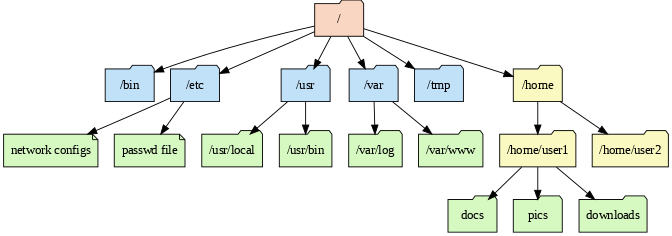

In [53]:
# @title
import graphviz as gv

# Create a directed graph
g = gv.Digraph(format='png')
g.attr(rankdir='TB', size='7,7')

# Root node
g.node('root', '/', shape='folder', style='filled', fillcolor='#f9d6c1')

# System directories
system_dirs = ['bin', 'etc', 'usr', 'var', 'tmp']
for d in system_dirs:
    g.node(d, f'/{d}', shape='folder', style='filled', fillcolor='#c1e1f9')
    g.edge('root', d)

# User directories
g.node('home', '/home', shape='folder', style='filled', fillcolor='#f9f9c1')
g.edge('root', 'home')

g.node('user1', '/home/user1', shape='folder', style='filled', fillcolor='#f9f9c1')
g.node('user2', '/home/user2', shape='folder', style='filled', fillcolor='#f9f9c1')
g.edge('home', 'user1')
g.edge('home', 'user2')

# User files
user_files = ['docs', 'pics', 'downloads']
for f in user_files:
    g.node(f'user1_{f}', f, shape='folder', style='filled', fillcolor='#d6f9c1')
    g.edge('user1', f'user1_{f}')

# Etc files
g.node('network', 'network configs', shape='note', style='filled', fillcolor='#d6f9c1')
g.node('passwd', 'passwd file', shape='note', style='filled', fillcolor='#d6f9c1')
g.edge('etc', 'network')
g.edge('etc', 'passwd')

# Usr directories
g.node('local', '/usr/local', shape='folder', style='filled', fillcolor='#d6f9c1')
g.node('bin2', '/usr/bin', shape='folder', style='filled', fillcolor='#d6f9c1')
g.edge('usr', 'local')
g.edge('usr', 'bin2')

# Var directories
g.node('log', '/var/log', shape='folder', style='filled', fillcolor='#d6f9c1')
g.node('www', '/var/www', shape='folder', style='filled', fillcolor='#d6f9c1')
g.edge('var', 'log')
g.edge('var', 'www')

# Render the graph
g.render('linux_file_hierarchy', view=False)

Image('linux_file_hierarchy.png', width=900)

Understanding file systems helps you organize your data effectively and explains why different storage devices may have different capabilities and limitations when working with files.

# Input/Output Management: Connecting with Devices

Input/Output (I/O) management is how the operating system handles communication between your computer and external devices. This system allows programs to interact with hardware like keyboards, displays, storage devices, and network adapters without needing to understand the specific details of each device.

## How the I/O System Works

The I/O subsystem creates a bridge between software and hardware:

* **Device drivers** are special programs that know how to talk to specific hardware devices
* When you type on your keyboard, the **input** travels through several layers before reaching your program
* When your program wants to display something on screen, the **output** travels through these layers in reverse
* The operating system uses **buffers** (temporary storage areas) to handle speed differences between devices
* **Caching** keeps frequently accessed data in faster memory to improve response times

## Types of Devices in Linux

In Linux systems like Ubuntu, devices are treated as special files:

* **Block devices** transfer data in large chunks and allow random access (like hard drives and USB drives)
* **Character devices** transfer data one character at a time (like keyboards and mice)
* **Network devices** connect your computer to other computers (like ethernet and WiFi adapters)
* All of these devices appear as files in the **/dev** directory, following Linux's "everything is a file" philosophy

## Examining Connected Devices

You can see what devices are connected to your Ubuntu system using simple commands:


In [7]:
# List all block devices (storage)
!lsblk

NAME    MAJ:MIN RM  SIZE RO TYPE MOUNTPOINTS
loop0     7:0    0  110G  0 loop 
sda       8:0    0   90G  0 disk 
├─sda1    8:1    0 85.8G  0 part /etc/hosts
│                                /etc/hostname
│                                /etc/resolv.conf
│                                /kaggle/input
├─sda2    8:2    0   16M  0 part 
├─sda3    8:3    0    2G  0 part 
├─sda4    8:4    0   16M  0 part 
├─sda5    8:5    0    2G  0 part 
├─sda6    8:6    0  512B  0 part 
├─sda7    8:7    0  512B  0 part 
├─sda8    8:8    0   16M  0 part 
├─sda9    8:9    0  512B  0 part 
├─sda10   8:10   0  512B  0 part 
├─sda11   8:11   0    8M  0 part 
└─sda12   8:12   0   32M  0 part 


In [9]:
# Check network devices
!ip addr

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
11: eth0@if12: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc noqueue state UP group default 
    link/ether 02:42:ac:1c:00:0c brd ff:ff:ff:ff:ff:ff link-netnsid 0
    inet 172.28.0.12/16 brd 172.28.255.255 scope global eth0
       valid_lft forever preferred_lft forever



## Device Management in Action

| Device Type | Example in Ubuntu | How Programs Access It | What It Does |
|-------------|-------------------|------------------------|--------------|
| Storage | /dev/sda (hard drive) | File operations | Stores your files permanently |
| Input | /dev/input/mouse0 | Input events | Records your mouse movements |
| Display | /dev/fb0 (framebuffer) | Graphics libraries | Shows information on screen |
| Network | eth0, wlan0 | Network sockets | Connects to the internet |

Understanding I/O management helps explain how your operating system handles everything from keyboard input to saving files. The next time you plug in a USB drive and it automatically appears on your desktop, you'll know that it's the I/O subsystem and device drivers working together to make that happen.

# The Linux/Ubuntu File Hierarchy: Finding Your Way Around

Ubuntu, like all Linux distributions, organizes its files according to the Filesystem Hierarchy Standard (FHS). This standardized structure makes it easier to navigate and understand where different types of files are located. Let's explore the most important directories you'll encounter as a beginner.

## The Root Directory Structure

Everything in Linux begins at the root directory (/), with each major subsystem having its own dedicated directory:

* The **/** directory is the root of the entire file system hierarchy where all other directories branch from
* **/home** provides personal directories for regular users, where each user has their own folder (like /home/student)
* **/etc** houses system-wide configuration files that control how programs operate
* **/usr** contains most of the programs and applications installed on the system
* **/bin** contains essential command binaries (programs) that everyone needs to use
* **/tmp** provides space for temporary files that are deleted when the computer restarts


In [10]:
# Show your current location (present working directory)
!pwd

/content


In [11]:
# List files in your current directory
!ls

example.txt  new_folder  sample_data


In [12]:
# List files with more details (permissions, size, date)
!ls -l

total 12
-rw-r--r-- 1 root root   14 Apr 28 19:28 example.txt
drwxr-xr-x 2 root root 4096 Apr 28 19:32 new_folder
drwxr-xr-x 1 root root 4096 Apr 25 17:44 sample_data


In [14]:
%%bash
# Change to your home directory and show what's there
cd ~
pwd
ls

/root


Here I used  **bash**, a language that is used to write scripts consisting of a series of Linux commands.


## Files vs. Directories

In Linux, there are a few key differences between files and directories:

* **Directories** are special files that contain other files and directories (similar to folders)
* **Regular files** store data, text, or programs and can be opened, edited, and executed
* You can tell which is which in a listing: directories often appear in a different color or with a / after their name
* Creating files and directories requires different commands (touch for files, mkdir for directories)

Understanding this basic organization will help you navigate Linux comfortably. As you continue learning, you'll discover more about the purpose of each directory and how the system uses them to keep everything organized.

# Users, Permissions, and Security in Ubuntu

Security is a fundamental aspect of any operating system. Ubuntu, like other Linux distributions, implements a simple yet powerful security model based on users, groups, and file permissions. Understanding these basic concepts will help you keep your files safe and understand how Linux protects the system.

## Users and Groups

Ubuntu organizes people and permissions through users and groups:

* Each person who uses the computer has their own **user account** with a username and password
* The **root** user (also called the superuser) has special powers to change anything on the system
* Users can belong to one or more **groups**, which makes it easier to manage permissions for multiple users
* Regular users can temporarily get superuser privileges using the **sudo** command for specific tasks
* This separation helps protect the system because regular users can't accidentally damage important system files

## Understanding File Permissions

Every file and directory in Ubuntu has three types of permissions:

* **Read (r)** permission allows viewing the contents of a file or listing the contents of a directory
* **Write (w)** permission allows changing the file or adding/removing files in a directory
* **Execute (x)** permission allows running a program file or accessing a directory
* Each file has separate permissions for the **owner**, the **group**, and **others** (everyone else)
* You can see these permissions when you run `ls -l` as a series of letters like `-rwxr-xr--`

## Working with Permissions in Jupyter

Here's how you can see and change permissions with simple commands:

In [15]:
# Show file permissions in the current directory
!ls -l

total 12
-rw-r--r-- 1 root root   14 Apr 28 19:28 example.txt
drwxr-xr-x 2 root root 4096 Apr 28 19:32 new_folder
drwxr-xr-x 1 root root 4096 Apr 25 17:44 sample_data




## Common Permission Patterns

| Permission Setting | What It Means | When to Use It |
|--------------------|--------------|---------------|
| 755 (rwxr-xr-x) | Owner can do anything, others can read and execute | Scripts, programs |
| 644 (rw-r--r--) | Owner can read and write, others can only read | Regular files, documents |
| 700 (rwx------) | Only owner can access the file | Private files |
| 600 (rw-------) | Only owner can read and write the file | Sensitive configuration files |

Understanding these basic security concepts helps keep your files safe and organized. When you create files in Ubuntu, the system automatically assigns default permissions, but you can change them if needed for special situations.

In [16]:
# Check who you are logged in as
!whoami

root


In [ ]:
# @title
%%html
<svg viewBox="0 0 800 400" xmlns="http://www.w3.org/2000/svg">
  <!-- Title -->
  <text x="400" y="40" font-family="Arial" font-size="24" text-anchor="middle" font-weight="bold">Understanding Linux File Permissions</text>

  <!-- Permission String Example -->
  <rect x="100" y="70" width="600" height="80" rx="10" fill="#f0f0f0" stroke="#333" stroke-width="2"/>

  <!-- Individual Characters -->
  <rect x="100" y="70" width="60" height="80" fill="#e6e6e6" stroke="#333" stroke-width="2"/>
  <text x="130" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">-</text>

  <rect x="160" y="70" width="60" height="80" fill="#ffcccc" stroke="#333" stroke-width="2"/>
  <text x="190" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">r</text>

  <rect x="220" y="70" width="60" height="80" fill="#ffcccc" stroke="#333" stroke-width="2"/>
  <text x="250" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">w</text>

  <rect x="280" y="70" width="60" height="80" fill="#ffcccc" stroke="#333" stroke-width="2"/>
  <text x="310" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">x</text>

  <rect x="340" y="70" width="60" height="80" fill="#ccffcc" stroke="#333" stroke-width="2"/>
  <text x="370" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">r</text>

  <rect x="400" y="70" width="60" height="80" fill="#ccffcc" stroke="#333" stroke-width="2"/>
  <text x="430" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">-</text>

  <rect x="460" y="70" width="60" height="80" fill="#ccffcc" stroke="#333" stroke-width="2"/>
  <text x="490" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">x</text>

  <rect x="520" y="70" width="60" height="80" fill="#ccccff" stroke="#333" stroke-width="2"/>
  <text x="550" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">r</text>

  <rect x="580" y="70" width="60" height="80" fill="#ccccff" stroke="#333" stroke-width="2"/>
  <text x="610" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">-</text>

  <rect x="640" y="70" width="60" height="80" fill="#ccccff" stroke="#333" stroke-width="2"/>
  <text x="670" y="115" font-family="Courier New" font-size="36" text-anchor="middle" font-weight="bold">-</text>

  <!-- Labels -->
  <text x="130" y="170" font-family="Arial" font-size="14" text-anchor="middle">File Type</text>
  <text x="250" y="170" font-family="Arial" font-size="14" text-anchor="middle" font-weight="bold">Owner</text>
  <text x="430" y="170" font-family="Arial" font-size="14" text-anchor="middle" font-weight="bold">Group</text>
  <text x="610" y="170" font-family="Arial" font-size="14" text-anchor="middle" font-weight="bold">Others</text>

  <!-- Numeric Values -->
  <text x="250" y="190" font-family="Arial" font-size="14" text-anchor="middle">4 + 2 + 1 = 7</text>
  <text x="430" y="190" font-family="Arial" font-size="14" text-anchor="middle">4 + 0 + 1 = 5</text>
  <text x="610" y="190" font-family="Arial" font-size="14" text-anchor="middle">4 + 0 + 0 = 4</text>

  <text x="400" y="220" font-family="Arial" font-size="18" text-anchor="middle" font-weight="bold">Numeric Representation: 754</text>

  <!-- Permission Table -->
  <rect x="150" y="240" width="500" height="140" fill="#f9f9f9" stroke="#333" stroke-width="2"/>

  <!-- Header -->
  <rect x="150" y="240" width="500" height="35" fill="#e0e0e0" stroke="#333" stroke-width="1"/>
  <text x="225" y="265" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Permission</text>
  <text x="400" y="265" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Symbol</text>
  <text x="575" y="265" font-family="Arial" font-size="16" text-anchor="middle" font-weight="bold">Value</text>

  <!-- Row 1 -->
  <line x1="150" y1="275" x2="650" y2="275" stroke="#333" stroke-width="1"/>
  <text x="225" y="295" font-family="Arial" font-size="14" text-anchor="middle">Read</text>
  <text x="400" y="295" font-family="Arial" font-size="14" text-anchor="middle">r</text>
  <text x="575" y="295" font-family="Arial" font-size="14" text-anchor="middle">4</text>

  <!-- Row 2 -->
  <line x1="150" y1="310" x2="650" y2="310" stroke="#333" stroke-width="1"/>
  <text x="225" y="330" font-family="Arial" font-size="14" text-anchor="middle">Write</text>
  <text x="400" y="330" font-family="Arial" font-size="14" text-anchor="middle">w</text>
  <text x="575" y="330" font-family="Arial" font-size="14" text-anchor="middle">2</text>

  <!-- Row 3 -->
  <line x1="150" y1="345" x2="650" y2="345" stroke="#333" stroke-width="1"/>
  <text x="225" y="365" font-family="Arial" font-size="14" text-anchor="middle">Execute</text>
  <text x="400" y="365" font-family="Arial" font-size="14" text-anchor="middle">x</text>
  <text x="575" y="365" font-family="Arial" font-size="14" text-anchor="middle">1</text>

  <!-- Vertical Lines -->
  <line x1="300" y1="240" x2="300" y2="380" stroke="#333" stroke-width="1"/>
  <line x1="500" y1="240" x2="500" y2="380" stroke="#333" stroke-width="1"/>
</svg>

This should say **root** (meaning you have sole power over the virtual machine you are currently working in).

# Basic Linux Commands: Navigating and Managing Files

The command line is a powerful way to interact with Ubuntu. Let's learn the most essential commands for beginners to navigate and work with files. In Jupyter notebooks, you can run these commands by adding an exclamation mark (!) at the beginning.

## Essential Navigation Commands

These commands help you move around the file system and see what's there:

* The **pwd** command shows your Present Working Directory (current location)
* Use **ls** to list files and directories in your current location
* The **cd** command lets you Change Directory to a new location
* **cd ..** moves up one level to the parent directory
* **cd ~** takes you to your home directory

## Creating and Managing Files and Directories

These basic commands let you create and organize your files:

* Create a new directory with the **mkdir** command (e.g., mkdir projects)
* Create an empty file with the **touch** command (e.g., touch notes.txt)
* Copy files with the **cp** command (e.g., cp original.txt copy.txt)
* Move or rename files with the **mv** command (e.g., mv old.txt new.txt)
* Remove files with the **rm** command (use carefully, as deletion is permanent!)

## Try These Commands in Jupyter



In [18]:
# Check your current location
!pwd

/content


In [19]:
# Create a new directory
!mkdir test_folder

In [20]:
# Create a file with some content
!echo "Hello, this is a test file" > test_folder/hello.txt

In [21]:
# List what's in the new directory
!ls test_folder

hello.txt


In [22]:
# Show the contents of the file
!cat test_folder/hello.txt


Hello, this is a test file


In [23]:
# Make a copy of the file
!cp test_folder/hello.txt test_folder/hello_copy.txt

In [24]:
# Verify both files exist
!ls test_folder

hello_copy.txt	hello.txt


These commands form the foundation for working with Linux. As you practice, you'll find that these basic commands can help you accomplish many tasks quickly and efficiently.

# Understanding System Resources with Terminal Commands

Have you ever wondered what's happening inside your computer? Ubuntu provides simple command-line tools that show you information about your system resources like CPU, memory, and disk space. These tools help you understand what's going on "under the hood" of your computer.

## Basic System Information Commands

These simple commands tell you about your computer's hardware and resources:

* The **uname** command shows basic system information like what operating system you're using
* **free** displays how much memory (RAM) is being used and how much is available
* **df** reports disk space usage, showing how full your storage drives are
* **lscpu** gives information about your computer's processor (CPU)
* **uptime** shows how long your system has been running and how busy it is

## Using These Commands in Jupyter

You can run these commands in Jupyter notebooks by adding an exclamation mark:



In [29]:
# See what version of Linux you're using
!uname -a

Linux f4dae590bc77 6.1.123+ #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


In [30]:
# Check memory usage
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       855Mi       8.3Gi       3.0Mi       3.5Gi        11Gi
Swap:             0B          0B          0B


In [31]:
# See disk space usage
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   38G   71G  35% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
tmpfs           6.4G  2.1M  6.4G   1% /var/colab
/dev/sda1        85G   66G   20G  78% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [32]:
# Get information about the CPU
!lscpu | head -10

Architecture:                         x86_64
CPU op-mode(s):                       32-bit, 64-bit
Address sizes:                        46 bits physical, 48 bits virtual
Byte Order:                           Little Endian
CPU(s):                               2
On-line CPU(s) list:                  0,1
Vendor ID:                            GenuineIntel
Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
CPU family:                           6
Model:                                79


In [33]:
# See how long the system has been running
!uptime

 19:47:25 up 27 min,  0 users,  load average: 0.42, 0.38, 0.36



## Understanding the Output

When you run these commands, here's what to look for:

* In **free** output, the "available" column shows your unused memory
* In **df** output, the "Use%" column shows how full each disk is
* The **load average** numbers in uptime show how busy your CPU is (1.0 means fully busy)

## Monitoring Resources Over Time

| Command | What It Shows | When It's Useful |
|---------|--------------|-----------------|
| top | Live view of running processes and system resources | When your system feels slow |
| htop | Enhanced version of top with a more user-friendly interface | For a clearer view of processes |
| watch | Runs any command repeatedly to see changes | To monitor a specific resource |
| vmstat | Virtual memory statistics | When investigating memory issues |

These commands are like looking at your computer's dashboard. They can help you understand why your computer might be running slowly or why a program crashed. With practice, you'll become more comfortable reading this information and using it to diagnose problems when they occur.

# Python's os Module: Interacting with the Operating System

While the command line is powerful, Python provides its own tools for interacting with the operating system. The `os` module is a built-in Python library that gives you access to operating system functionality, allowing you to work with files, directories, and processes directly from your Python code.

## Basic File and Directory Operations

The `os` module provides Python equivalents to many common Linux commands:

* Use `os.getcwd()` to get the current working directory (similar to the `pwd` command)
* `os.listdir()` shows the contents of a directory (similar to `ls`)
* `os.mkdir()` creates a new directory (like the `mkdir` command)
* `os.remove()` deletes a file (like the `rm` command)
* `os.rename()` moves or renames files (like the `mv` command)
* `os.path.join()` helps create proper file paths that work on any operating system

## Example: Working with Files and Directories

Here's how you can use these functions in a Jupyter notebook:

In [25]:
# Import the os module
import os

# Show current directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# List files in the current directory
files = os.listdir('.')
print(f"Files in current directory: {files}")

# Create a new directory
os.mkdir('python_test')
print("Created new directory 'python_test'")

# Create a file path that works on any OS
file_path = os.path.join('python_test', 'example.txt')

# Write to a file
with open(file_path, 'w') as f:
    f.write("Hello from Python!")

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file {file_path} exists")

# Get file information
file_size = os.path.getsize(file_path)
print(f"File size: {file_size} bytes")

Current directory: /content
Files in current directory: ['.config', 'test_folder', 'example.txt', 'new_folder', 'sample_data']
Created new directory 'python_test'
The file python_test/example.txt exists
File size: 18 bytes


## Path Handling in Python

Working with file paths is important, and Python's `os.path` submodule helps with this:

* `os.path.exists()` checks if a file or directory exists
* `os.path.isfile()` checks if a path is a file
* `os.path.isdir()` checks if a path is a directory
* `os.path.getsize()` gets the size of a file in bytes
* `os.path.abspath()` converts a relative path to an absolute path

## Getting System Information

The `os` module also provides information about the operating system:

In [26]:
# Check which operating system you're using
print(f"Operating system: {os.name}")

# On Linux/Mac, get environment variables
print(f"Home directory: {os.environ.get('HOME')}")

# On Linux/Mac, get the current user ID
if os.name == 'posix':  # For Linux/Mac
    print(f"User ID: {os.getuid()}")

Operating system: posix
Home directory: /root
User ID: 0


# Process Management in Linux: ps, top, and kill Commands

Managing processes is an important skill for working with any operating system. In Ubuntu, the terminal provides simple tools for viewing and controlling running programs. These commands help you understand what's happening on your system and fix problems when programs freeze or use too many resources.

## Viewing Running Processes

Linux offers a few easy ways to see what programs are running on your system:

* The **ps** command shows a snapshot of current processes
* **ps aux** shows all processes from all users with detailed information
* **top** provides a live, updating view of processes that refreshes every few seconds
* The processes are listed with information like their ID number, owner, memory usage, and CPU usage
* Each running program has a unique **Process ID (PID)** that's used to identify it

## Basic Process Viewing in Jupyter

You can check what processes are running with these simple commands:


In [34]:
# Show a simple list of your processes
!ps

    PID TTY          TIME CMD
      1 ?        00:00:00 docker-init
      6 ?        00:00:04 node
      8 ?        00:00:01 oom_monitor.sh
     10 ?        00:00:00 run.sh
     11 ?        00:00:00 kernel_manager_
     39 ?        00:00:00 tail
     45 ?        00:00:00 tail
     71 ?        00:00:24 python3 <defunct>
     72 ?        00:00:01 colab-fileshim.
     89 ?        00:00:07 jupyter-noteboo
     90 ?        00:00:02 dap_multiplexer
    267 ?        00:00:19 python3
    301 ?        00:00:05 python3
    302 ?        00:00:01 language_servic
    308 ?        00:00:30 node
   7044 ?        00:00:00 sleep
   7045 ?        00:00:00 ps


In [35]:
# Show all processes with detailed information
!ps aux


USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0   1076     8 ?        Ss   19:20   0:00 /sbin/docker-
root           6  0.2  0.5 1231428 69096 ?       Sl   19:20   0:04 /tools/node/b
root           8  0.0  0.0   7376  3380 ?        S    19:20   0:01 /bin/bash -e 
root          10  0.0  0.0   7376  1880 ?        S    19:20   0:00 /bin/bash -e 
root          11  0.0  0.1 1237640 15660 ?       Sl   19:20   0:00 /usr/colab/bi
root          39  0.0  0.0   5808  1044 ?        Ss   19:20   0:00 tail -n +0 -F
root          45  0.0  0.0   5808  1000 ?        Ss   19:20   0:00 tail -n +0 -F
root          71  1.4  0.0      0     0 ?        Z    19:20   0:24 [python3] <de
root          72  0.0  0.4  76344 57732 ?        S    19:20   0:01 python3 /usr/
root          89  0.4  0.9 383624 131188 ?       Sl   19:20   0:07 /usr/bin/pyth
root          90  0.1  0.0 1230344 9836 ?        Sl   19:20   0:02 /usr/local/bi
root         267  1.1  2.3 1493196

In [36]:
# See an interactive display of processes (will run once)
!top -n 1

=top - 19:49:16 up 29 min,  0 users,  load average: 0.41, 0.39, 0.37
Tasks:  17 total,   1 running,  15 sleeping,   0 stopped,   1 zombie
%Cpu(s):  6.7 us,  3.3 sy,  0.0 ni, 90.0 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  12978.0 total,   8510.8 free,    887.1 used,   3580.1 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  11788.0 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND  
    267 root      20   0 1493196 314804  84500 S   6.7   2.4   0:20.07 python3  
      1 root      20   0    1076      8      0 S   0.0   0.0   0:00.08 docker-+ 
      6 root      20   0 1231428  69096  41640 S   0.0   0.5   0:04.63 node     
      8 root      20   0    7376   3380   3072 S   0.0   0.0   0:01.13 oom_mon+ 
     10 root      20   0    7376   1880   1596 S   0.0   0.0   0:00.00 run.sh   
     11 root      20   0 1237640  15424   9512 S   0.0   0.1   0:00.94 kernel_+ 
     39 root      20   0    5808   1044    952 S   0.0   0.0 

Using Python's `os` module gives you the power of operating system commands with the flexibility and readability of Python. This approach allows you to write scripts that work with files and directories programmatically, which is especially useful for automation tasks and when working with large numbers of files.


## Controlling Processes

Sometimes you need to stop a program, especially if it's frozen or using too many resources:

* The **kill** command lets you stop a process by sending it a signal
* You need to know the process ID (PID) to use the kill command
* **kill -9** forcefully terminates a stubborn process that won't close normally
* The **killall** command can stop a process by name instead of ID
* These commands are powerful, so be careful not to stop important system processes

## Example: Finding and Managing Processes

| Task | Command | Example |
|------|---------|---------|
| Find processes by name | grep with ps | !ps aux \| grep firefox |
| See the most CPU-intensive processes | top sorted by CPU | !top -n 1 -o %CPU |
| Stop a process | kill | !kill 1234 |
| Force-stop a process | kill -9 | !kill -9 1234 |
| Stop a process by name | killall | !killall firefox |

Understanding these basic process management commands helps you keep your system running smoothly. If a program ever freezes or stops responding, you can use these tools to identify it and close it safely.

# Creating and Managing Files and Directories with Python

Python provides powerful tools for working with files and directories through the `os` and `shutil` modules. These capabilities allow you to create programs that can organize, process, and manage files automatically, a common task in many applications.

## File Operations in Python

Python makes it easy to create, read, write, and manipulate files:

* Open and create files using the built-in `open()` function with different modes:
  * `'r'` for reading (default)
  * `'w'` for writing (creates new file or overwrites existing)
  * `'a'` for appending (adds to end of file)
* The `with` statement ensures files are properly closed after use
* Reading methods include `read()`, `readline()`, and `readlines()`
* Writing is done with the `write()` and `writelines()` methods

## Basic File Reading and Writing Example

Here's a simple example of reading and writing files:

```python

```




In [28]:
# Writing to a file
with open('example.txt', 'w') as file:
    file.write("Hello, this is line 1\n")
    file.write("This is line 2\n")
    file.write("This is line 3\n")

# Reading from a file
with open('example.txt', 'r') as file:
    content = file.read()
    print("File contents:")
    print(content)

# Reading line by line
with open('example.txt', 'r') as file:
    print("Reading line by line:")
    for line in file:
        print(f"Line: {line.strip()}")

File contents:
Hello, this is line 1
This is line 2
This is line 3

Reading line by line:
Line: Hello, this is line 1
Line: This is line 2
Line: This is line 3


## Directory Management with Python

The `os` and `shutil` modules provide functions for managing directories:

* Create directories with `os.mkdir()` for a single directory or `os.makedirs()` for nested directories
* List directory contents with `os.listdir()` or use `os.scandir()` for more detailed information
* Delete files with `os.remove()` and empty directories with `os.rmdir()`
* The `shutil` module handles more complex operations like copying and moving files

In [27]:
import os
import shutil

# Create a directory structure
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Create some files
with open('data/raw/sensor1.txt', 'w') as f:
    f.write("Temperature: 23.5C\n")
    f.write("Humidity: 45%\n")

# List directories
print("Contents of data directory:")
print(os.listdir('data'))

# Copy a file
shutil.copy('data/raw/sensor1.txt', 'data/processed/sensor1_backup.txt')

# List all files recursively
print("\nAll files in the data directory:")
for root, dirs, files in os.walk('data'):
    for file in files:
        path = os.path.join(root, file)
        print(f"Found file: {path}")

Contents of data directory:
['raw', 'processed']

All files in the data directory:
Found file: data/raw/sensor1.txt
Found file: data/processed/sensor1_backup.txt



## Working with File Paths

Python's `os.path` module helps you handle file paths correctly:

* `os.path.join()` combines path components using the correct separator for your OS
* `os.path.basename()` extracts the filename from a path
* `os.path.dirname()` extracts the directory name from a path
* `os.path.splitext()` separates a filename from its extension

Using these functions makes your code more portable across different operating systems, as the path separators (/ or \\) are handled automatically.

These Python tools allow you to create programs that can automate file management tasks that would be tedious to do manually, saving time and reducing errors, especially when working with large numbers of files.